In [ ]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd, tensorflow as tf
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import plot_model
import os

# PREPROCESSING
## LOADING DATASET AND NORMALIZATON (MIN-MAX)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#min-max normalization
x_train = np.expand_dims(x_train.astype('float32') / 255.0, -1)
x_test = np.expand_dims(x_test.astype('float32') / 255.0, -1)
#categorization
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## DESCRIPTIVE STATISTICS

In [ ]:
print("Training data format:", x_train.shape)
print("Testing data format:", x_test.shape)

Training data format: (60000, 28, 28, 1)
Testing data format: (10000, 28, 28, 1)


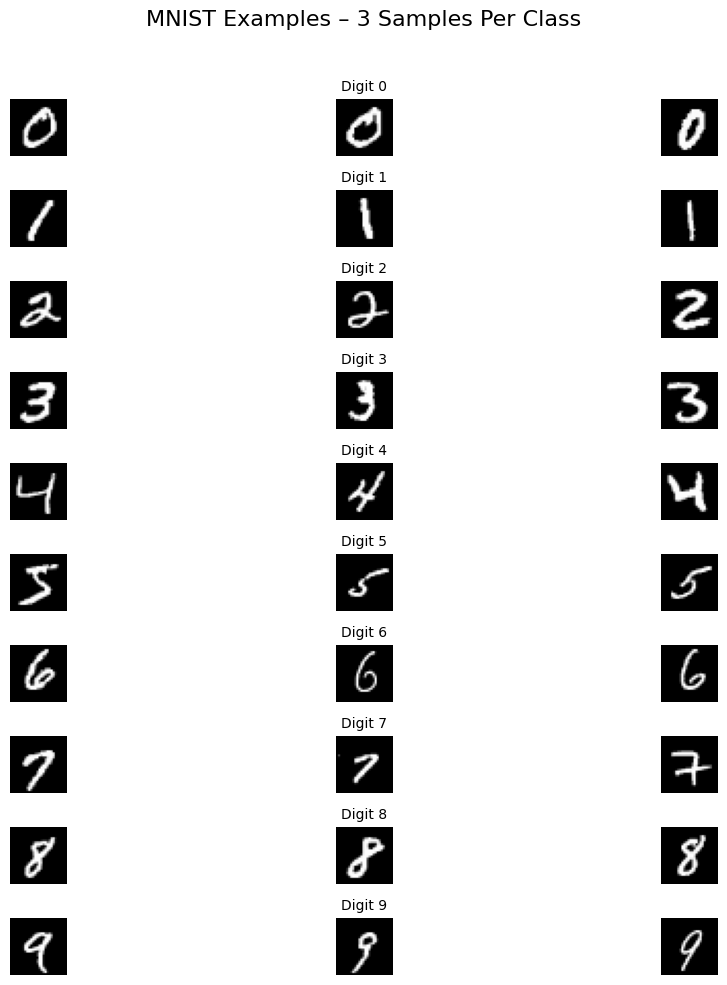

In [ ]:
samples_per_class = 3
num_classes = 10

plt.figure(figsize=(12, 10))
for digit in range(num_classes):
    idxs = np.where(y_train == digit)[0][:samples_per_class]
    for i, idx in enumerate(idxs):
        plt_idx = digit * samples_per_class + i + 1
        plt.subplot(num_classes, samples_per_class, plt_idx)
        plt.imshow(x_train[idx], cmap='gray')
        plt.axis('off')
        if i == 1:
            plt.title(f"Digit {digit}", fontsize=10)
plt.suptitle("MNIST Examples – 3 Samples Per Class", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("mnist_digit_grid.png", dpi=300)
plt.show()

Building the CNN Model (LeNet-5 Architecture)

In [ ]:
def create_lenet_model(activation):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(6, kernel_size=(5, 5), activation=activation),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation=activation),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation=activation),
        Dense(84, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# MODEL TANH

In [ ]:
model_tanh = create_lenet_model('tanh')

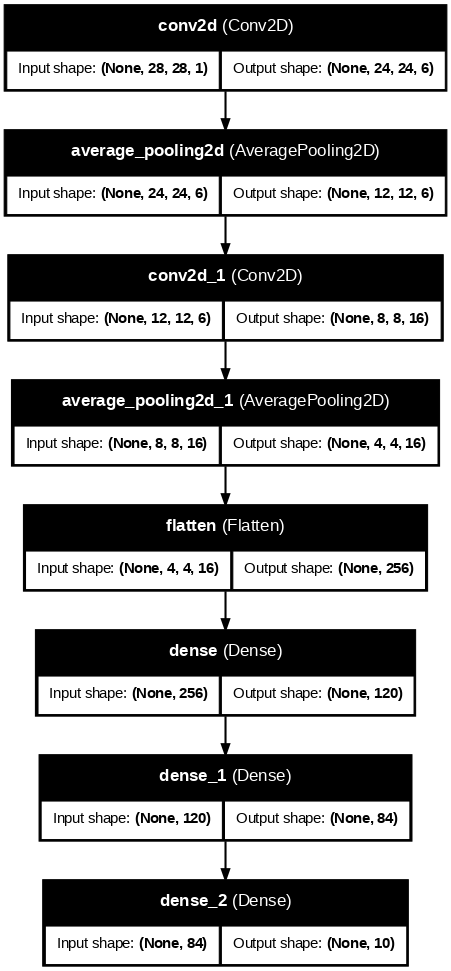

In [ ]:
plot_model(model_tanh,
           to_file="model_tanh.png",
           show_shapes=True,
           show_layer_names=True,
           dpi=75)

## MODEL TANH TRAINING

In [ ]:
history_tanh = model_tanh.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1, verbose=0)
test_loss_tanh, test_acc_tanh = model_tanh.evaluate(x_test, y_test_cat, verbose=0)

## CONFUSION MATRIX

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


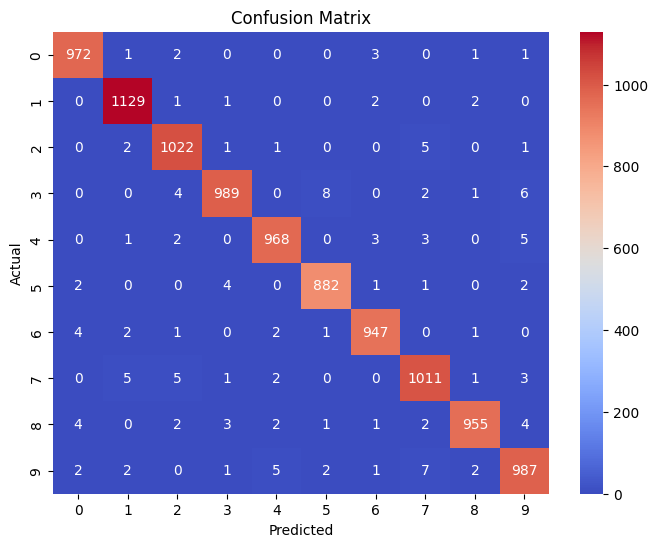

In [ ]:
y_pred = model_tanh.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## TANH CLASSIFICATION REPORT

In [ ]:
report = classification_report(y_test, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

,precision,recall,f1-score,support
0,0.987805,0.991837,0.989817,980.0000
1,0.988616,0.994714,0.991656,1135.0000
2,0.983638,0.990310,0.986963,1032.0000
3,0.989000,0.979208,0.984080,1010.0000
4,0.987755,0.985743,0.986748,982.0000
5,0.986577,0.988789,0.987682,892.0000
6,0.988518,0.988518,0.988518,958.0000
7,0.980601,0.983463,0.982030,1028.0000
8,0.991693,0.980493,0.986061,974.0000
9,0.978196,0.978196,0.978196,1009.0000


## GROUND TRUTH VS PREDICTION OF TANH

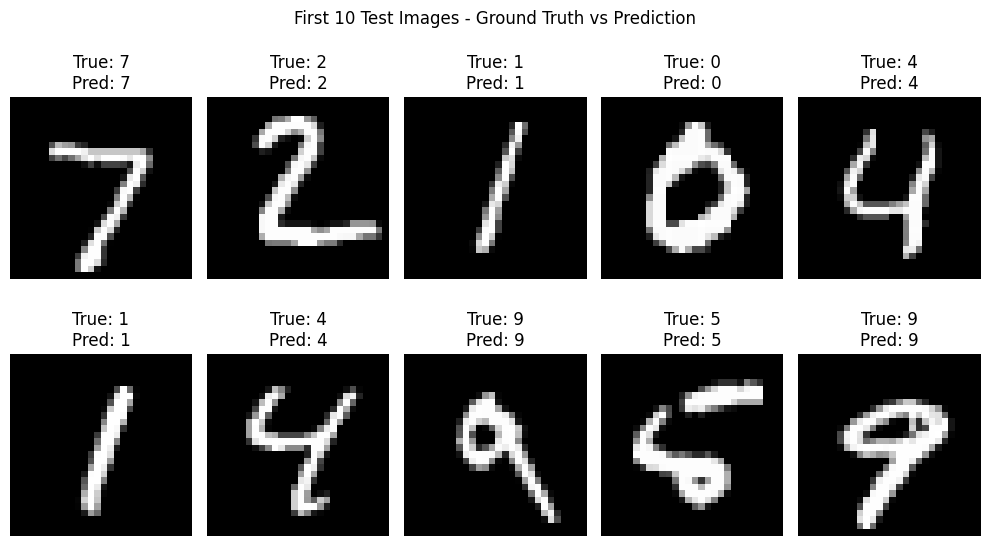

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')

plt.suptitle("First 10 Test Images - Ground Truth vs Prediction")
plt.tight_layout()
plt.show()

# MODEL SIGMOID

In [ ]:
model_sigmoid = create_lenet_model('sigmoid')

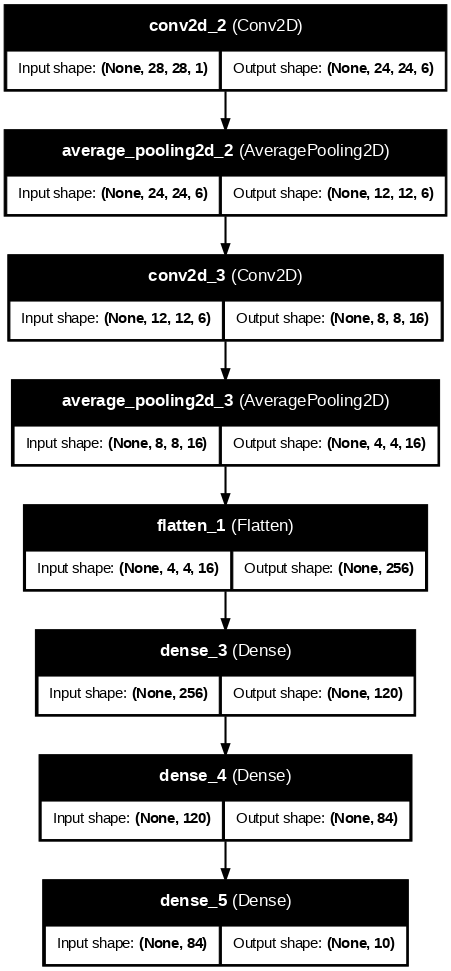

In [ ]:
plot_model(model_sigmoid,
           to_file="model_sigmoid.png",
           show_shapes=True,
           show_layer_names=True,
           dpi=75)

## MODEL SIGMOID TRAINING

In [ ]:
history_sigmoid = model_sigmoid.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1, verbose=0)
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(x_test, y_test_cat, verbose=0)

## CONFUSION MATRIX

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


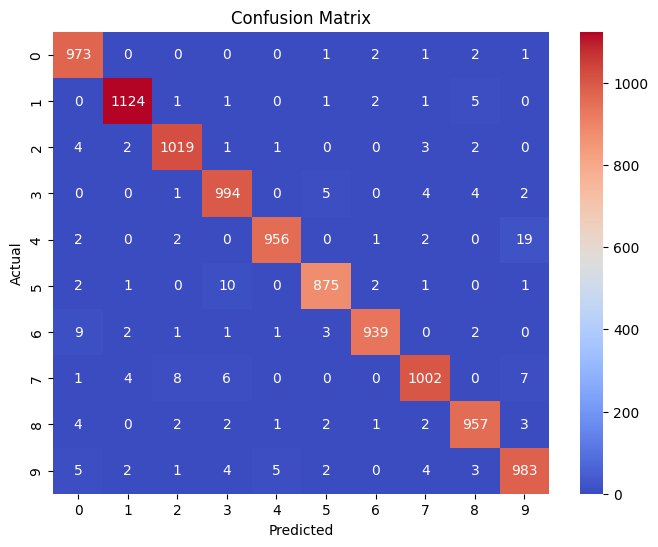

In [ ]:
y_pred = model_sigmoid.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## SIGMOID CLASSIFICATION REPORT

In [ ]:
report = classification_report(y_test, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

,precision,recall,f1-score,support
0,0.973000,0.992857,0.982828,980.0000
1,0.990308,0.990308,0.990308,1135.0000
2,0.984541,0.987403,0.985970,1032.0000
3,0.975466,0.984158,0.979793,1010.0000
4,0.991701,0.973523,0.982528,982.0000
5,0.984252,0.980942,0.982594,892.0000
6,0.991552,0.980167,0.985827,958.0000
7,0.982353,0.974708,0.978516,1028.0000
8,0.981538,0.982546,0.982042,974.0000
9,0.967520,0.974232,0.970864,1009.0000


## GROUND TRUTH VS PREDICTION OF SIGMOID

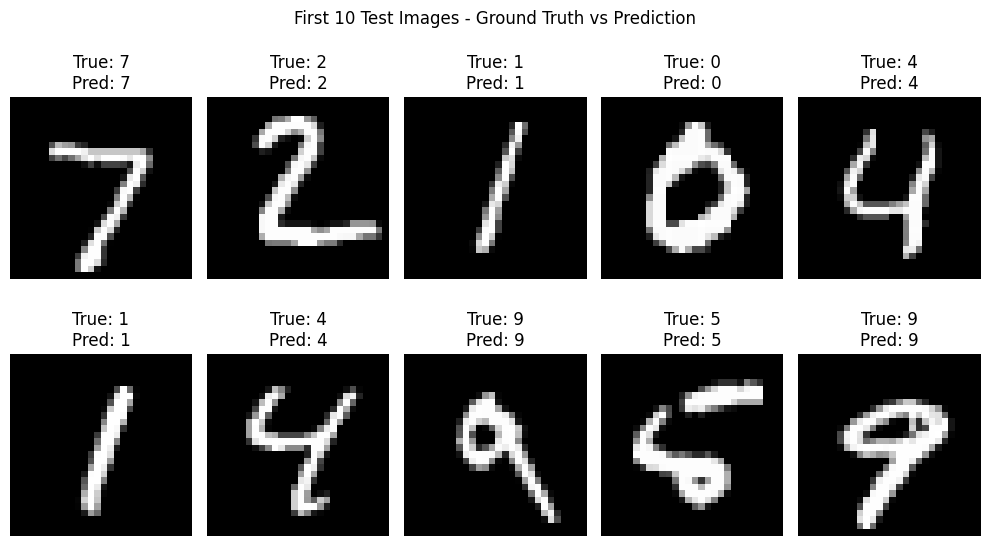

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')

plt.suptitle("First 10 Test Images - Ground Truth vs Prediction")
plt.tight_layout()
plt.show()

# MODEL RELU

In [ ]:
model_relu = create_lenet_model('relu')

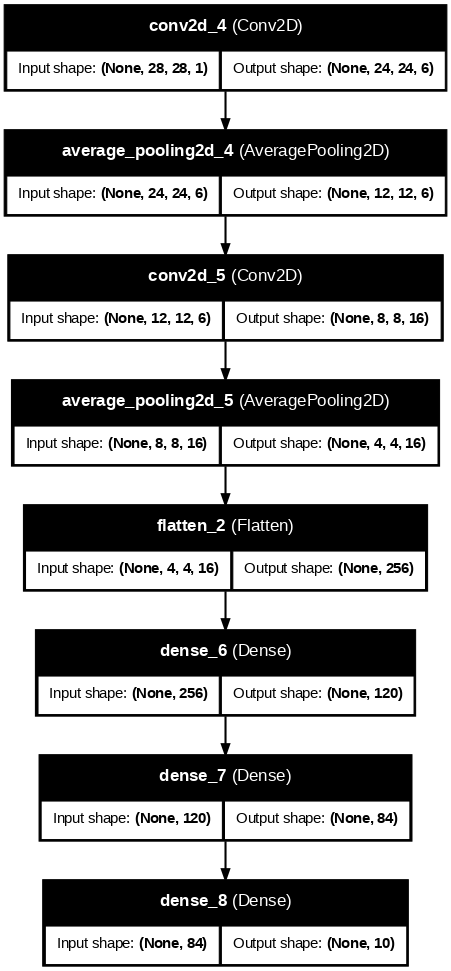

In [ ]:
plot_model(model_relu,
           to_file="model_relu.png",
           show_shapes=True,
           show_layer_names=True,
           dpi=75)

## MODEL RELU TRAINING

In [ ]:
history_relu = model_relu.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1, verbose=0)
test_loss_relu, test_acc_relu = model_relu.evaluate(x_test, y_test_cat, verbose=0)

## CONFUSION MATRIX

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


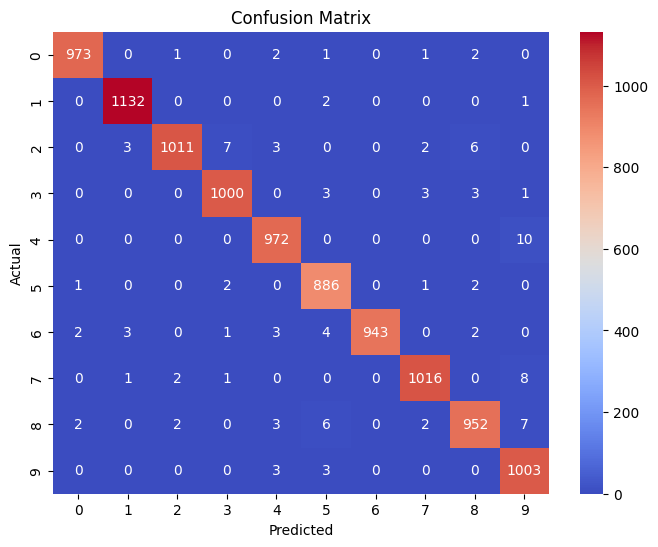

In [ ]:
y_pred = model_relu.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## RELU CLASSIFICATION REPORT

In [ ]:
report = classification_report(y_test, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

,precision,recall,f1-score,support
0,0.994888,0.992857,0.993871,980.0000
1,0.993854,0.997357,0.995602,1135.0000
2,0.995079,0.979651,0.987305,1032.0000
3,0.989120,0.990099,0.989609,1010.0000
4,0.985801,0.989817,0.987805,982.0000
5,0.979006,0.993274,0.986088,892.0000
6,1.000000,0.984342,0.992109,958.0000
7,0.991220,0.988327,0.989771,1028.0000
8,0.984488,0.977413,0.980938,974.0000
9,0.973786,0.994054,0.983816,1009.0000


## GROUND TRUTH VS PREDICTION OF RELU

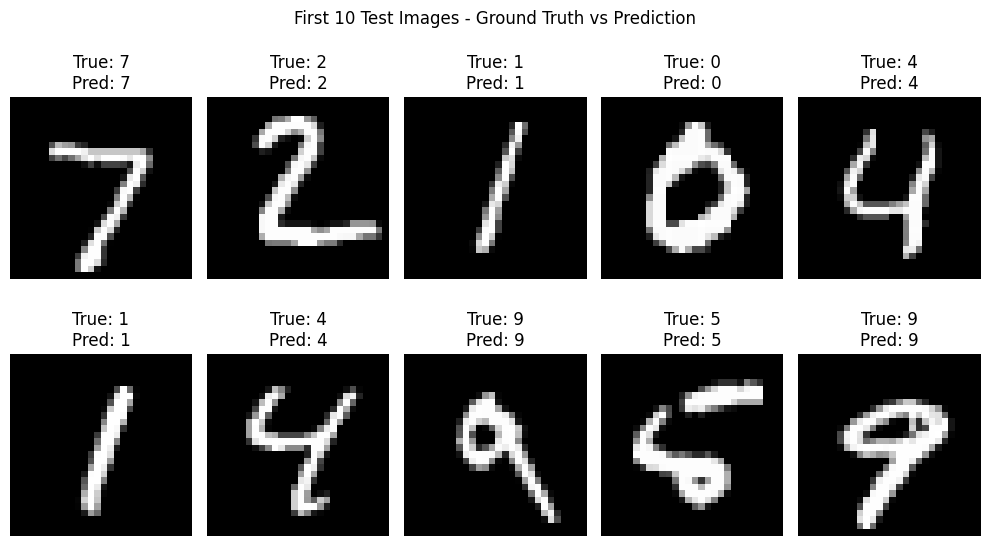

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')

plt.suptitle("First 10 Test Images - Ground Truth vs Prediction")
plt.tight_layout()
plt.show()

# MODEL ELU

In [ ]:
model_elu = create_lenet_model('elu')

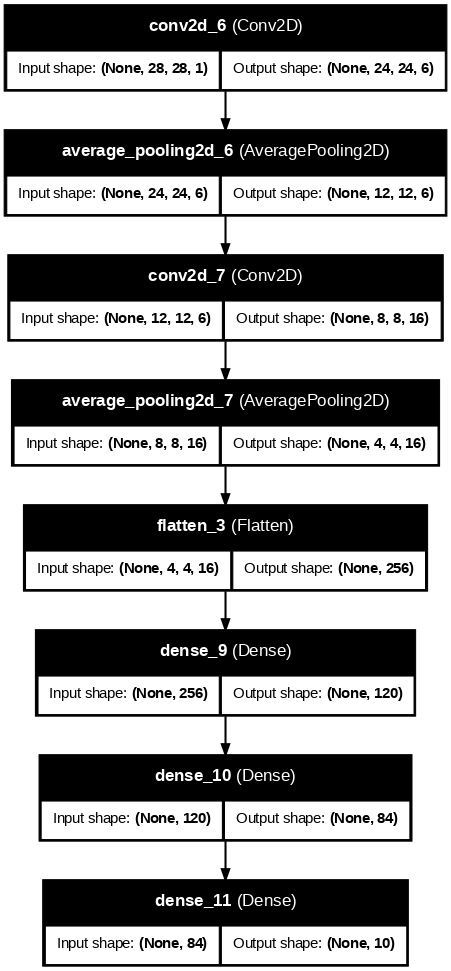

In [ ]:
plot_model(model_elu,
           to_file="model_elu.png",
           show_shapes=True,
           show_layer_names=True,
           dpi=75)

## MODEL ELU TRAINING

In [ ]:
history_elu = model_elu.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1, verbose=0)
test_loss_elu, test_acc_elu = model_elu.evaluate(x_test, y_test_cat, verbose=0)

## CONFUSION MATRIX

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


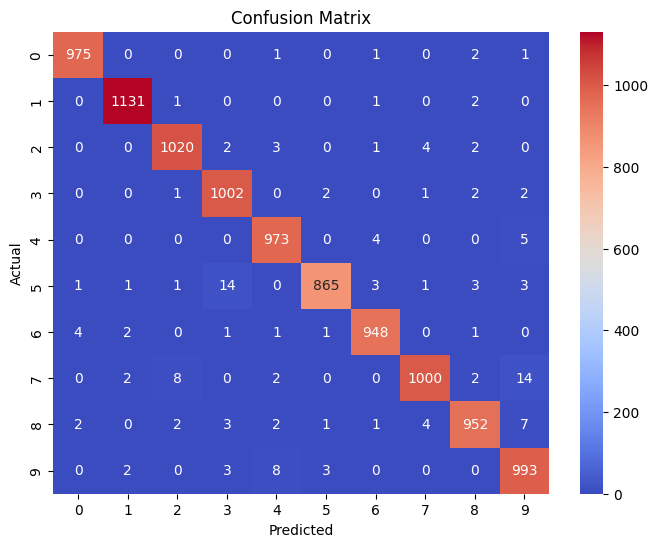

In [ ]:
y_pred = model_elu.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ELU CLASSIFICATION REPORT

In [ ]:
report = classification_report(y_test, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

,precision,recall,f1-score,support
0,0.992872,0.994898,0.993884,980.0000
1,0.993849,0.996476,0.995161,1135.0000
2,0.987415,0.988372,0.987893,1032.0000
3,0.977561,0.992079,0.984767,1010.0000
4,0.982828,0.990835,0.986815,982.0000
5,0.991972,0.969731,0.980726,892.0000
6,0.988530,0.989562,0.989045,958.0000
7,0.990099,0.972763,0.981354,1028.0000
8,0.985507,0.977413,0.981443,974.0000
9,0.968780,0.984143,0.976401,1009.0000


## GROUND TRUTH VS PREDICTION OF ELU

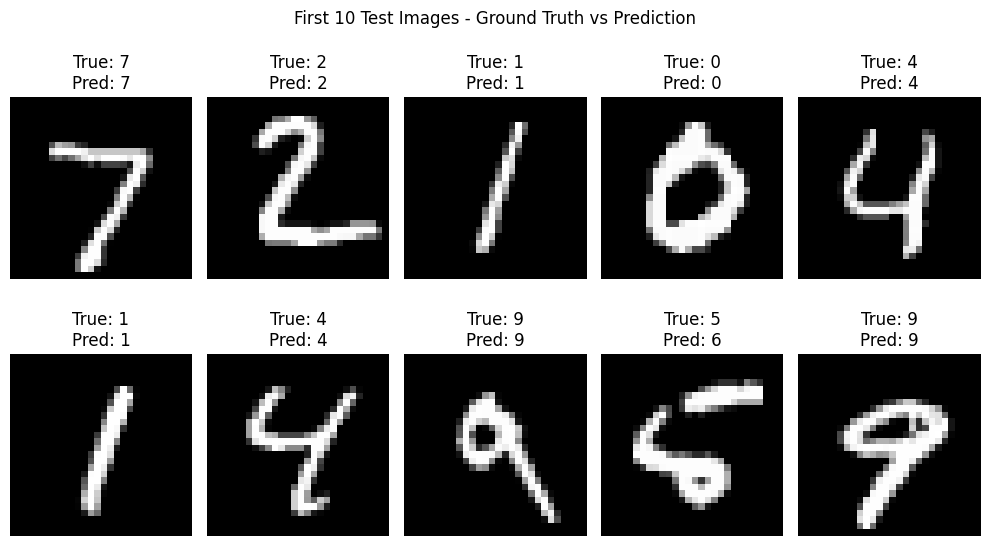

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')

plt.suptitle("First 10 Test Images - Ground Truth vs Prediction")
plt.tight_layout()
plt.show()

# COMPARISON OF MODELS (BENCHMARKING)

In [ ]:
print("\nTest Set Results:\n")
print(f"Tanh     - Accuracy: {test_acc_tanh:.4f} | Loss: {test_loss_tanh:.4f}")
print(f"Sigmoid  - Accuracy: {test_acc_sigmoid:.4f} | Loss: {test_loss_sigmoid:.4f}")
print(f"ReLU     - Accuracy: {test_acc_relu:.4f} | Loss: {test_loss_relu:.4f}")
print(f"ELU      - Accuracy: {test_acc_elu:.4f} | Loss: {test_loss_elu:.4f}")


Test Set Results:

Tanh     - Accuracy: 0.9862 | Loss: 0.0457
Sigmoid  - Accuracy: 0.9822 | Loss: 0.0573
ReLU     - Accuracy: 0.9888 | Loss: 0.0326
ELU      - Accuracy: 0.9859 | Loss: 0.0547


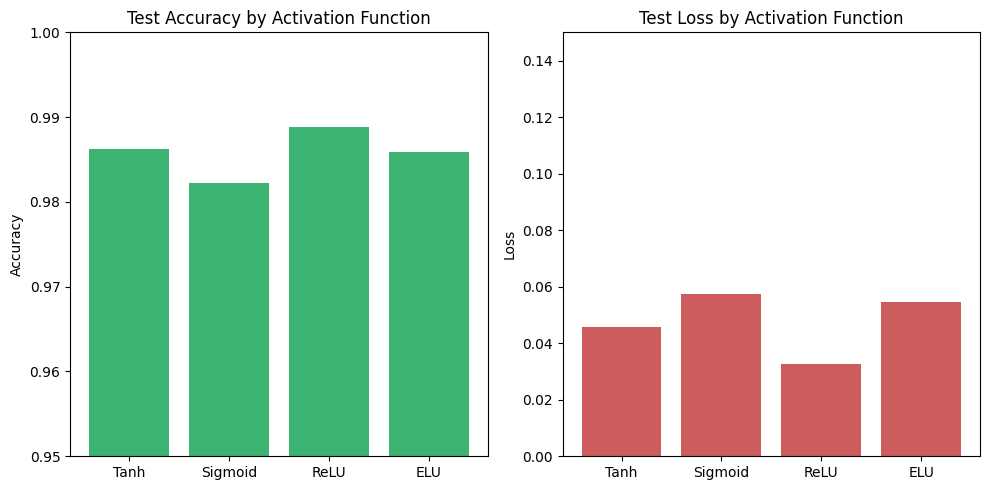

In [ ]:
test_results_df = pd.DataFrame({
    "Activation Function": ["Tanh", "Sigmoid", "ReLU", "ELU"],
    "Test Accuracy": [test_acc_tanh, test_acc_sigmoid, test_acc_relu, test_acc_elu],
    "Test Loss": [test_loss_tanh, test_loss_sigmoid, test_loss_relu, test_loss_elu]
})

plt.figure(figsize=(10, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.bar(test_results_df["Activation Function"], test_results_df["Test Accuracy"], color='mediumseagreen')
plt.title("Test Accuracy by Activation Function")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)

# Loss
plt.subplot(1, 2, 2)
plt.bar(test_results_df["Activation Function"], test_results_df["Test Loss"], color='indianred')
plt.title("Test Loss by Activation Function")
plt.ylabel("Loss")
plt.ylim(0.0, 0.15)

plt.tight_layout()
plt.show()

In [ ]:
print("\nTest Result as Table\n")
print(test_results_df)


Test Result as Table

  Activation Function  Test Accuracy  Test Loss
0                Tanh         0.9862   0.045712
1             Sigmoid         0.9822   0.057321
2                ReLU         0.9888   0.032638
3                 ELU         0.9859   0.054745


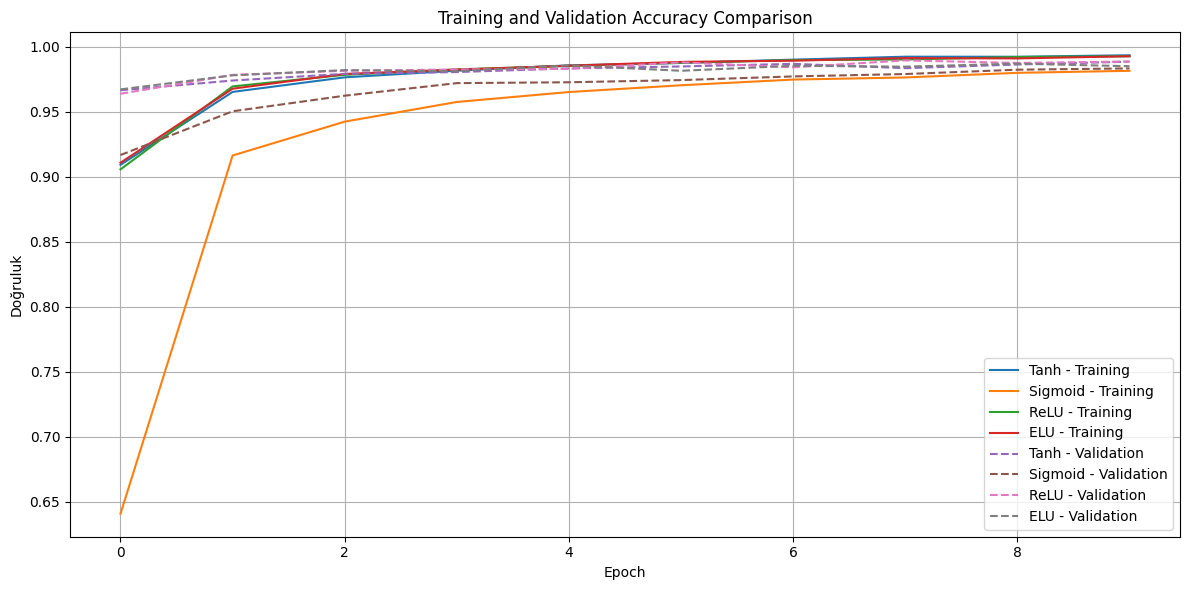

In [ ]:
plt.figure(figsize=(10, 5))

# Training Accuracies
plt.plot(history_tanh.history['accuracy'], label='Tanh - Training')
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid - Training')
plt.plot(history_relu.history['accuracy'], label='ReLU - Training')
plt.plot(history_elu.history['accuracy'], label='ELU - Training')

# Validation Accuracies
plt.plot(history_tanh.history['val_accuracy'], '--', label='Tanh - Validation')
plt.plot(history_sigmoid.history['val_accuracy'], '--', label='Sigmoid - Validation')
plt.plot(history_relu.history['val_accuracy'], '--', label='ReLU - Validation')
plt.plot(history_elu.history['val_accuracy'], '--', label='ELU - Validation')

plt.title("Training and Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

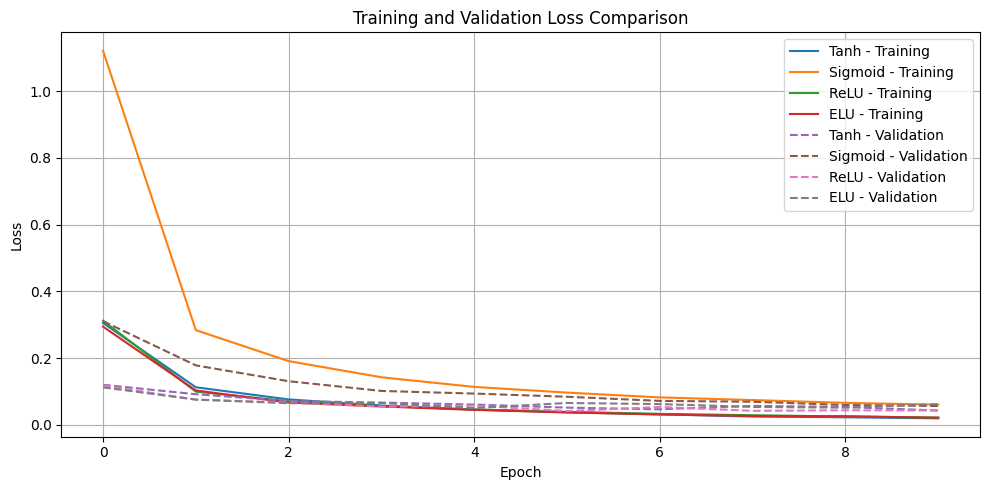

In [ ]:
plt.figure(figsize=(10, 5))

# Training loss
plt.plot(history_tanh.history['loss'], label='Tanh - Training')
plt.plot(history_sigmoid.history['loss'], label='Sigmoid - Training')
plt.plot(history_relu.history['loss'], label='ReLU - Training')
plt.plot(history_elu.history['loss'], label='ELU - Training')

# Validation loss
plt.plot(history_tanh.history['val_loss'], '--', label='Tanh - Validation')
plt.plot(history_sigmoid.history['val_loss'], '--', label='Sigmoid - Validation')
plt.plot(history_relu.history['val_loss'], '--', label='ReLU - Validation')
plt.plot(history_elu.history['val_loss'], '--', label='ELU - Validation')

plt.title("Training and Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()
